In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import json

# 1. Linear Regression using 'labeled_data_1'

labeled_data_1 contains the following information about each data point:

- Score by rubric (manual)
- delta hbonds
- delta contacts
- delta clashes
- delta interresidual
- delta interhelical
- rationalized score (*what does this mean?*)

In [81]:
with open("../data/labeled_data_1.json", "r") as json_file:
    data = json.load(json_file)

In [88]:
y = np.array([entry['Manual Score'] for entry in data])
X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'Manual Score'}.values())) for entry in data])

print(X.shape)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_eval)

mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation_coefficient = np.corrcoef(y_eval, y_pred)[0, 1]
print("Pearson Correlation Coefficient:", correlation_coefficient)

(130, 6)
Mean Squared Error: 4.02511798980862
R-squared: 0.09811741428219178
Pearson Correlation Coefficient: 0.33170919192730863


# 2. Linear Regression using 'labeled_data'

labeled_data contains the following information about each data point:

- Score by rubric (manual)
- hbonds before, hbonds after
- contacts before, contacts after
- clashes before, clashes after
- interresidual before, interresidual after
- interhelical before, interhelical after
- rationalized score (*what does this mean?*)

### 2.1 Splitting the data

Split the data into 80% training and 20% evaluation. Use the training data to fit the model and use the evaluation data to see how well the model performs on data it hasn't been trained on

In [89]:
with open("../data/labeled_data.json", "r") as json_file:
    data = json.load(json_file)

In [90]:
y = np.array([entry['Manual Score'] for entry in data])
X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'Manual Score'}.values())) for entry in data])
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_eval)

mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation_coefficient = np.corrcoef(y_eval, y_pred)[0, 1]
print("Pearson Correlation Coefficient:", correlation_coefficient)

Mean Squared Error: 3.8618219986403544
R-squared: 0.053104217961233435
Pearson Correlation Coefficient: 0.36196702830818167


### 2.2 Fit on all of the data

Use all of the limited data to fit a linear regression model, then see how well this model performs on itself. Note that this shouldn't be used as a model for the rest of the data, as it's not possible to test here whether or not the model has overfit.

In [91]:
with open("../data/labeled_data.json", "r") as json_file:
    data = json.load(json_file)

In [92]:
y = np.array([entry['Manual Score'] for entry in data])
X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'Manual Score'}.values())) for entry in data])

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation_coefficient = np.corrcoef(y, y_pred)[0, 1]
print("Pearson Correlation Coefficient:", correlation_coefficient)

Mean Squared Error: 3.7637869572389917
R-squared: 0.22712555567861314
Pearson Correlation Coefficient: 0.4765769147562781


# 3. Linear Regression using 'labeled_data_2'

## 3.1 Splitting the data

In [103]:
with open("../data/labeled_data_2.json", "r") as json_file:
    data = json.load(json_file)

y = np.array([entry['score'] for entry in data.values()])
X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'score'}.values())) for entry in data.values()])
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.05)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_eval)

mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation_coefficient = np.corrcoef(y_eval, y_pred)[0, 1]
print("Pearson Correlation Coefficient:", correlation_coefficient)

Mean Squared Error: 1.0954583726208618
R-squared: -4.367746025842223
Pearson Correlation Coefficient: -0.3302448349660342


## 3.2 Fit on all of the data

In [104]:
with open("../data/labeled_data_2.json", "r") as json_file:
    data = json.load(json_file)

y = np.array([entry['score'] for entry in data.values()])
X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'score'}.values())) for entry in data.values()])
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation_coefficient = np.corrcoef(y, y_pred)[0, 1]
print("Pearson Correlation Coefficient:", correlation_coefficient)

Mean Squared Error: 0.1484375
R-squared: 0.969590983726675
Pearson Correlation Coefficient: 0.9846781117333092


# 4. Assessing these approaches

In [39]:
def run_linear_regression(json_file, test_size=0.2):
    """
    Runs linear regression using the labeled data from json_file with train/eval splits according to test_size.
    
    Returns mean squared error, r^2 score, and the Pearson correlation coefficient
    """
    if json_file != "../data/labeled_data_2.json":
        orig = True
    else:
        orig = False
    
    with open(json_file, "r") as json_file:
        data = json.load(json_file)

    if orig:
        y = np.array([entry['Manual Score'] for entry in data])
        X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'Manual Score'}.values())) for entry in data])
    else:
        y = np.array([entry['score'] for entry in data.values()])
        X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'score'}.values())) for entry in data.values()])
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=test_size)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_eval)

    mse = mean_squared_error(y_eval, y_pred)
    r2 = r2_score(y_eval, y_pred)
    correlation_coefficient = np.corrcoef(y_eval, y_pred)[0, 1]

    return mse, r2, correlation_coefficient

In [77]:
mse_dict, r2_dict, correlation_coefficient_dict = {}, {}, {}
mse_dict["../data/labeled_data_1.json"], r2_dict["../data/labeled_data_1.json"], correlation_coefficient_dict["../data/labeled_data_1.json"] = [], [], []
mse_dict["../data/labeled_data.json"], r2_dict["../data/labeled_data.json"], correlation_coefficient_dict["../data/labeled_data.json"] = [], [], []
mse_dict["../data/labeled_data_2.json"], r2_dict["../data/labeled_data_2.json"], correlation_coefficient_dict["../data/labeled_data_2.json"] = [], [], []


test_sizes = [round(0.1 + i * 0.01, 2) for i in range(40)]

for json_file in ["../data/labeled_data_1.json", "../data/labeled_data.json", "../data/labeled_data_2.json"]:
    for test_size in test_sizes:
        mses, r2s, correlation_coefficients = [], [], []
        for _ in range(100):
            mse, r2, correlation_coefficient = run_linear_regression(json_file, test_size=test_size)
            mses.append(mse)
            r2s.append(r2)
            correlation_coefficients.append(correlation_coefficient)
        mse_dict[json_file].append(sum(mses) / len(mses))
        r2_dict[json_file].append(sum(r2s) / len(r2s))
        correlation_coefficient_dict[json_file].append(sum(correlation_coefficients) / len(correlation_coefficients))

KeyboardInterrupt: 

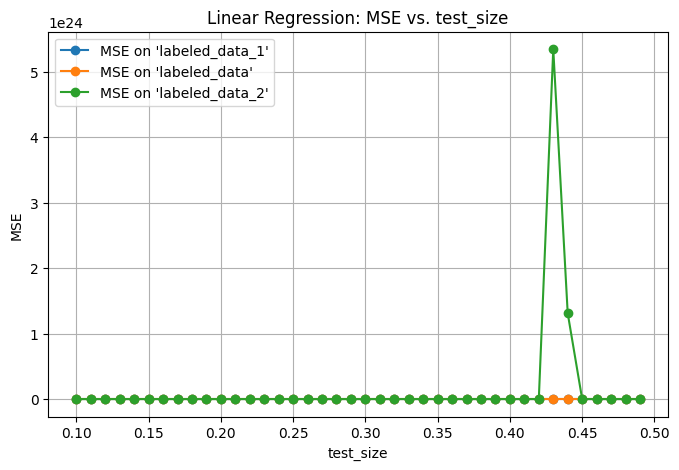

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(test_sizes, mse_dict["../data/labeled_data_1.json"], marker='o', linestyle='-', label="MSE on 'labeled_data_1'")
plt.plot(test_sizes, mse_dict["../data/labeled_data.json"], marker='o', linestyle='-', label="MSE on 'labeled_data'")
plt.plot(test_sizes, mse_dict["../data/labeled_data_2.json"], marker='o', linestyle='-', label="MSE on 'labeled_data_2'")
plt.title('Linear Regression: MSE vs. test_size')
plt.xlabel('test_size')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

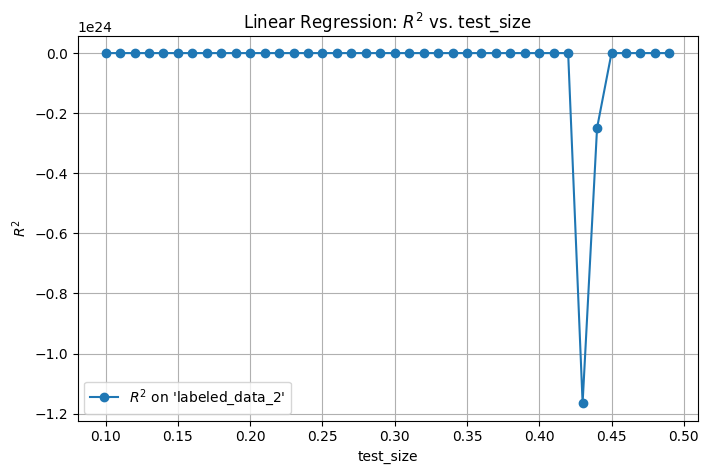

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(test_sizes, r2_dict["../data/labeled_data_1.json"], marker='o', linestyle='-', label="$R^2$ on 'labeled_data_1'")
plt.plot(test_sizes, r2_dict["../data/labeled_data.json"], marker='o', linestyle='-', label="$R^2$ on 'labeled_data'")
plt.plot(test_sizes, r2_dict["../data/labeled_data_2.json"], marker='o', linestyle='-', label="$R^2$ on 'labeled_data_2'")
plt.title('Linear Regression: $R^2$ vs. test_size')
plt.xlabel('test_size')
plt.ylabel('$R^2$')
plt.grid(True)
plt.legend()
plt.show()

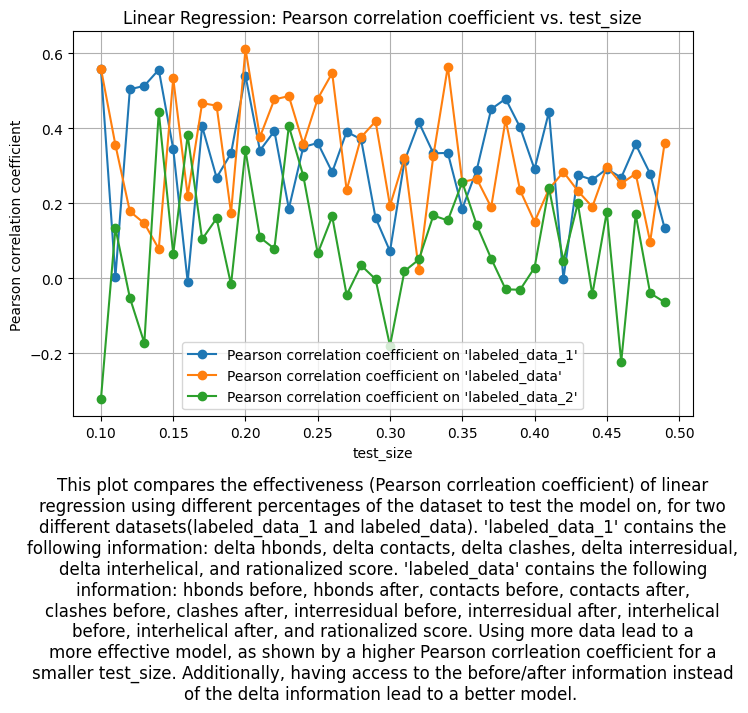

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(test_sizes, correlation_coefficient_dict["../data/labeled_data_1.json"], marker='o', linestyle='-', label="Pearson correlation coefficient on 'labeled_data_1'")
plt.plot(test_sizes, correlation_coefficient_dict["../data/labeled_data.json"], marker='o', linestyle='-', label="Pearson correlation coefficient on 'labeled_data'")
plt.plot(test_sizes, correlation_coefficient_dict["../data/labeled_data_2.json"], marker='o', linestyle='-', label="Pearson correlation coefficient on 'labeled_data_2'")
plt.title('Linear Regression: Pearson correlation coefficient vs. test_size')
plt.xlabel('test_size')
plt.ylabel('Pearson correlation coefficient')
plt.grid(True)
plt.legend()
caption = "This plot compares the effectiveness (Pearson corrleation coefficient) of linear\nregression using different percentages of the dataset to test the model on, for two\ndifferent datasets(labeled_data_1 and labeled_data). 'labeled_data_1' contains the\nfollowing information: delta hbonds, delta contacts, delta clashes, delta interresidual,\ndelta interhelical, and rationalized score. 'labeled_data' contains the following\ninformation: hbonds before, hbonds after, contacts before, contacts after,\nclashes before, clashes after, interresidual before, interresidual after, interhelical\nbefore, interhelical after, and rationalized score. Using more data lead to a\nmore effective model, as shown by a higher Pearson corrleation coefficient for a\nsmaller test_size. Additionally, having access to the before/after information instead\nof the delta information lead to a better model. "
plt.text(0.5, -0.45, caption, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.show()

# 5. Linear Regression on Test data

In [ ]:
with open("../data/labeled_data.json", "r") as json_file:
    data = json.load(json_file)
y_train = np.array([entry['Manual Score'] for entry in data])
X_train = np.array([np.array(list({k : v for k, v in entry.items() if k != 'Manual Score'}.values())) for entry in data])

with open("../data/test_data.json", "r") as json_file:
    data = json.load(json_file)
test_names = np.array([entry['Mutation'] for entry in data])
X_test = np.array([np.array(list({k : v for k, v in entry.items() if k != 'Mutation'}.values())) for entry in data])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_labeled = [(test_names[i], y_pred[i]) for i in range(len(y_pred))]

with open("../data/test_labeled.json", "w") as json_file:
    json.dump(test_labeled, json_file)